In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#User creation

users=pd.read_csv("takehome_users.csv",encoding='Greek')
users.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted                     12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [28]:
users.isnull().sum()/len(users)*100

object_id                      0.000
creation_time                  0.000
name                           0.000
email                          0.000
creation_source                0.000
last_session_creation_time    26.475
opted_in_to_mailing_list       0.000
enabled_for_marketing_drip     0.000
org_id                         0.000
invited_by_user_id            46.525
adopted                        0.000
dtype: float64

In [29]:
users['invited_by_user_id'].fillna(0,inplace=True)
users['last_session_creation_time'].fillna(0,inplace=True)

users['creation_time']=pd.to_datetime(users['creation_time'],format='%Y-%m-%d %H:%M:%S')

<AxesSubplot:xlabel='opted_in_to_mailing_list', ylabel='count'>

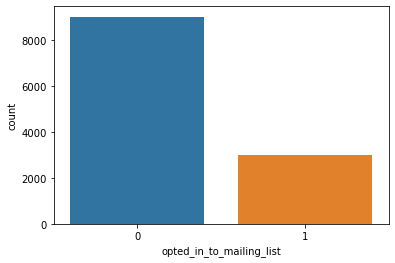

In [30]:
sns.countplot(x='opted_in_to_mailing_list',data=users)

<AxesSubplot:xlabel='enabled_for_marketing_drip', ylabel='count'>

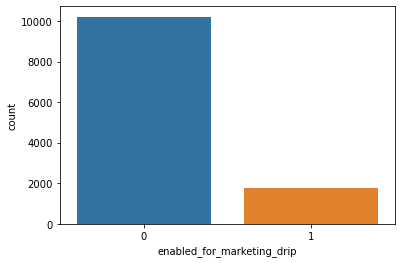

In [31]:
sns.countplot(x='enabled_for_marketing_drip',data=users)

Text(0, 0.5, 'Count')

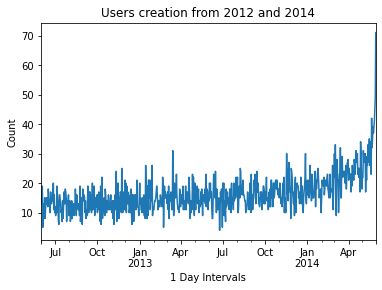

In [32]:
users.set_index('creation_time').resample('1D').count()['object_id'].plot()
plt.title('Users creation from 2012 and 2014')
plt.xlabel('1 Day Intervals')
plt.ylabel('Count')

In [33]:
users['invited_by_user_id'].value_counts().iloc[:10]

0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
11770.0      11
2354.0       10
10628.0      10
7012.0       10
4803.0       10
Name: invited_by_user_id, dtype: int64

In [34]:
users['org_id'].value_counts().iloc[:20]

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
8      97
14     87
12     75
11     75
17     74
18     73
16     72
13     72
20     68
15     64
Name: org_id, dtype: int64

In [35]:
users.groupby(by='creation_source')['object_id'].count()

creation_source
GUEST_INVITE          2163
ORG_INVITE            4254
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: object_id, dtype: int64

In [36]:
users['last_session_creation_time'].value_counts().iloc[:5]

0.000000e+00    3177
1.401868e+09       2
1.401917e+09       2
1.398139e+09       1
1.381812e+09       1
Name: last_session_creation_time, dtype: int64

In [37]:
enga=pd.read_csv('takehome_user_engagement.csv')
enga.head()

,time_stamp,user_id,visited
0,22-04-2014 03:53,1,1
1,15-11-2013 03:45,2,1
2,29-11-2013 03:45,2,1
3,09-12-2013 03:45,2,1
4,25-12-2013 03:45,2,1


In [38]:
enga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [39]:
enga['time_stamp'] = pd.to_datetime(enga['time_stamp'])
enga['date'] = enga['time_stamp'].dt.date

Text(0, 0.5, 'Count')

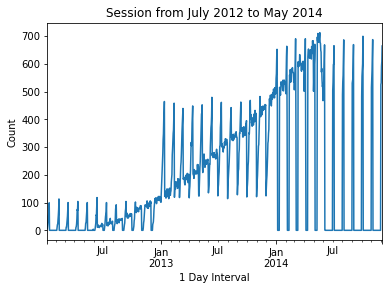

In [40]:
enga.set_index('time_stamp').resample('1D').count()['visited'].plot()
plt.title('Session from July 2012 to May 2014')
plt.xlabel('1 Day Interval')
plt.ylabel('Count')

C:\Users\Dell\AppData\Local\Temp\ipykernel_7264\1188373504.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'])


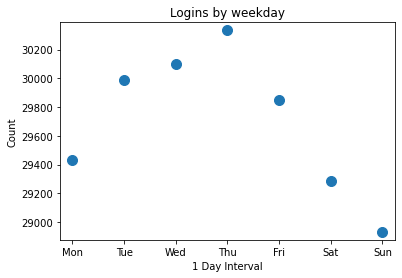

In [41]:
w=enga['time_stamp'].dt.weekday.value_counts().sort_index()
ax=w.plot(marker='.',linestyle='none',markersize=20,visible=True)
ax.set_xticklabels(['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Logins by weekday')
plt.xlabel('1 Day Interval')
plt.ylabel('Count')
plt.margins(0.04)

Text(0.5, 1.0, 'Top 20 Users')

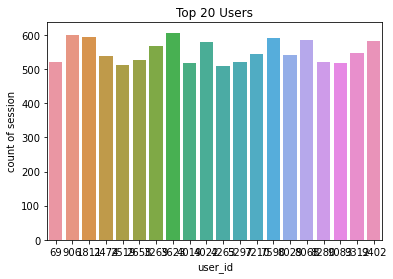

In [42]:
t=enga.groupby('user_id')['visited'].count().sort_values(ascending=False)[:20].reset_index()
sns.barplot(x='user_id',y='visited',data=t)
plt.xlabel('user_id')
plt.ylabel('count of session')
plt.title('Top 20 Users')

In [44]:
#Factors that predict future user adoption

enga.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:00,1,1,2014-04-22
1,2013-11-15 03:45:00,2,1,2013-11-15
2,2013-11-29 03:45:00,2,1,2013-11-29
3,2013-09-12 03:45:00,2,1,2013-09-12
4,2013-12-25 03:45:00,2,1,2013-12-25


In [45]:
grouped=enga.groupby('user_id')

In [46]:
users['adopted']=0

In [47]:
for name,group in grouped:
    num_logins=len(group)
    if num_logins >=3:
        dates=group['date'].drop_duplicates().reset_index(drop=True)
        for i in range(num_logins-2):
            delta=dates[i+2]-dates[i]
            if delta.days<7:
                users.loc[users['object_id']==name,'adopted']=1
                break
len(users[users['adopted']==1])


1970

In [48]:
adopted=users[users['adopted']==1]
adopted.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,0.0,1
32,33,2014-03-11 06:29:09,Araujo Josι,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,1
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,0.0,1


<AxesSubplot:xlabel='adopted', ylabel='count'>

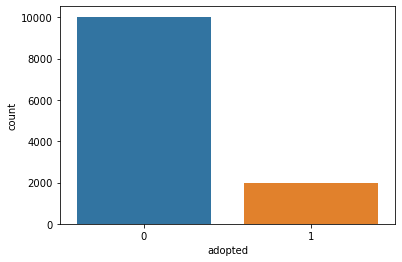

In [49]:
sns.countplot(x='adopted',data=users)

<AxesSubplot:xlabel='opted_in_to_mailing_list', ylabel='count'>

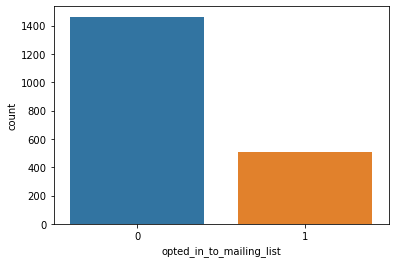

In [50]:
sns.countplot(x='opted_in_to_mailing_list',data=adopted)

<AxesSubplot:xlabel='enabled_for_marketing_drip', ylabel='count'>

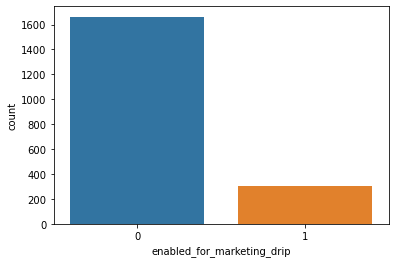

In [51]:
sns.countplot(x='enabled_for_marketing_drip',data=adopted)